<a href="https://colab.research.google.com/github/05-515/AI-start/blob/main/14_2_hw_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание. Линейная регрессия
В этом домашнем задании вам предстоит написать свой класс линейной регрессии и протестировать его для решения задачи регрессии.

Работать мы будем с тем же датасетом пингвинов, что и на семинаре. Ссылка на скачивание датасета: [датасет](https://drive.google.com/file/d/1IxN3dR1D6W_hUI656ghr2T3HcolgLsMF/view?usp=share_link)

![picture](https://imgur.com/orZWHly.png)

## Импорт библиотек и загрузка данных

Импортируем нужные библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим датасет (так же, как мы это делали на семинаре):

In [2]:
data = pd.read_csv('C:/Users/030110/Downloads/penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





И теперь реализуем свой класс линейной регрессии, который затем обучим на датасете:

## Реализация класса линейной регрессии

Ниже — заготовка класса линейной регрессии. Ваша задача — написать код для его методов и отправить этот код (весь код класса, всю ячейку ниже) на проверку на Степик. Для этого нужно будет скопировать код класса в поле для отправки ответа на Степике.

Перед тем как отправлять код на Степик, можно (и нужно!) проверить его на правильность, попробовав обучить свою линейную регрессию на данных пингвинов, которые мы только что загрузили. Код для этого реализован ниже.

Несколько комментариев к заданию:
- для каждого метода класса (fit, predict) описано, что этот метод принимает на вход и какой функционал реализует. По сути, fit — это аналог метода fit модели линейной регресси из sklearn, predict — аналог метода predict модели линейной регресси из sklearn;
- в методе fit при полечении коэффициентов линейной регрессии вам нужно получить две переменные: self.coef_ и self.intercept_. В self.coef_ должен получиться массив коэффициентов, которые модель поставила в соответствие признакам датасета. В self.intercept_ должно получиться одно число — коэффициент-свободный член, который выучила модель. По сути, self.coef_ и self.intercept_ должны быть аналогами этих же переменных модели Linear Regression из sklearn.

Алгоритм реализации метода fit:
1. Перевести X и y в numpy array (для удобства). Это уже реализовано;
2. Добавить к Х первый столбец из единиц. Подсказка: чтобы это сделать, удобно использовать np.hstack. Подумайте, как именно;
3. Получить массив коэффициентов k по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)
4. Разбить полученный массив коэффициентов k на self.coef_ и self.intercept_

Алгоритм реализации метода predict:
1. Получить значения y_pred, используя значения выученных коэффициентов и входящих признаков Х по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)

In [68]:
class MyLinearRegression:

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None


    def fit(self, X, y):
        '''
        функция обучения линейной регрессии. Аналог метода fit модели LinearRegression из sklearn.
        функция принимает на вход обучающую выборку
        (Х — матрица признаков, y — массив ответов, значений целевой переменной),
        и подбирает кожффициенты линейной регрессии.

        входящие параметры:
            X: матрица размера (n, f), где n — количество элементов датасета,
               f — количество признаков
            y: массив размера (n, ), где n — количество элементов датасета
        '''
        # переведем X и y в формат numpy array,
        # чтобы было проще работать
        X = np.array(X)
        y = np.array(y)

        # реализуйте код получения коэффициентов линейной
        # регрессии по заданной обучающей выборке Х и y.
        # инструкция по реализации дана выше. Не забудьте про
        # вектор-столбец из единиц!
        ones_column = np.ones((X.shape[0],1))
        X = np.hstack((X,ones_column))
        coefficients = np.linalg.inv(X.T @ X) @ X.T @ y 
        
        # список коэффициентов, которые модель поставила
        # в соответствие признакам датасета.
        self.coef_ = coefficients[:-1]
        # коэффициент — свободный член.
        self.intercept_ = coefficients[-1]

    def predict(self, X):
        '''
        функция получения предсказания линейной регрессии по входящему массиву признаков Х.

        входящие параметры:
            X: матрица размера (n, f), где n — количество элементов датасета,
               f — количество признаков
        '''

        X_new = np.column_stack([X, np.ones(X.shape[0])])
        y_pred = X_new @ np.append(self.coef_, self.intercept_)

        return y_pred

In [69]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

## Тестирование класса линейной регрессии

Давайте протестируем наш самописный класс MyLinearRegression, чтобы убедиться, что мы написали его верно. Обязательно протестируйте ваш класс перед отправкой кода на Степик!

### Датасет с одним признаком

Сначала протестируем случай, когда у нас всего один признак в данных. Так же, как и на практическом занятии, заведем переменные Х и y, и присвоим Х один из столбцов нашего датасета пингвинов. В этот раз давайте будем пытаться предсказывать длину клюва пингвина по его длине плавника.

In [56]:
X = data[['длина плавника']]
y = data['длина клюва']

[[181.   1.]
 [186.   1.]
 [195.   1.]
 [193.   1.]
 [190.   1.]
 [181.   1.]
 [195.   1.]
 [182.   1.]
 [191.   1.]
 [198.   1.]
 [185.   1.]
 [195.   1.]
 [197.   1.]
 [184.   1.]
 [194.   1.]
 [174.   1.]
 [180.   1.]
 [189.   1.]
 [185.   1.]
 [180.   1.]
 [187.   1.]
 [183.   1.]
 [187.   1.]
 [172.   1.]
 [180.   1.]
 [178.   1.]
 [178.   1.]
 [188.   1.]
 [184.   1.]
 [195.   1.]
 [196.   1.]
 [190.   1.]
 [180.   1.]
 [181.   1.]
 [184.   1.]
 [182.   1.]
 [195.   1.]
 [186.   1.]
 [196.   1.]
 [185.   1.]
 [190.   1.]
 [182.   1.]
 [190.   1.]
 [191.   1.]
 [186.   1.]
 [188.   1.]
 [190.   1.]
 [200.   1.]
 [187.   1.]
 [191.   1.]
 [186.   1.]
 [193.   1.]
 [181.   1.]
 [194.   1.]
 [185.   1.]
 [195.   1.]
 [185.   1.]
 [192.   1.]
 [184.   1.]
 [192.   1.]
 [195.   1.]
 [188.   1.]
 [190.   1.]
 [198.   1.]
 [190.   1.]
 [190.   1.]
 [196.   1.]
 [197.   1.]
 [190.   1.]
 [195.   1.]
 [191.   1.]
 [184.   1.]
 [187.   1.]
 [195.   1.]
 [189.   1.]
 [196.   1.]
 [187.   1.]

Разобьем Х и y на train и test:

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

И визуализируем точки обучающей выборки:

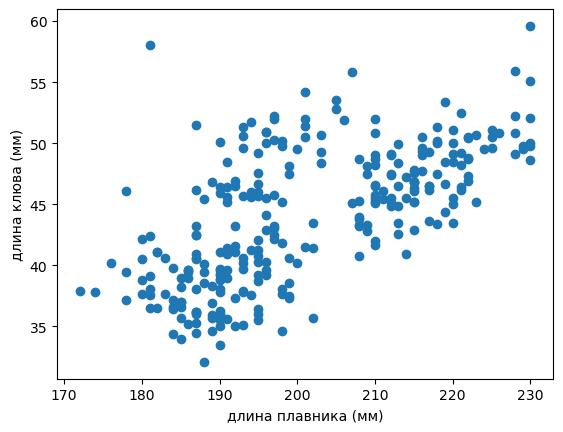

In [14]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

Отлично. Теперь объявим и обучим нашу линейную регрессию:

In [43]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)

И посмотрим, какие у нашей линейной регрессии получились коэффициенты:

In [16]:
my_lr.coef_, my_lr.intercept_

(array([0.25335284]), -6.9452415037943265)

Теперь мы можем визуализировать прямую, которую описывает наша линейная регрессия. Делаем это точно тем же кодом, что на практическом занятии. Убедитесь, что ваша линейная регрессия строит прямую, которая адекватно описывает точки (т.е. похожа на правильную).

c:\Users\030110\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\030110\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


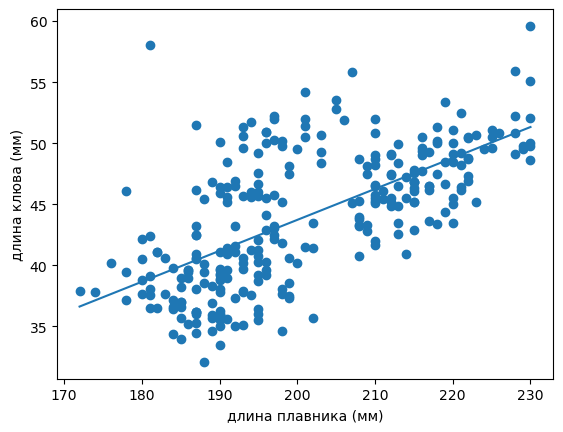

In [17]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = coef_*x_1 + intercept_
def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_

x = [np.min(X_train), np.max(X_train)]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('длина плавника (мм)')
plt.ylabel('длина клюва (мм)')

plt.show()

Хорошо, мы убедились, что наша линейная регрессия как-то работает: выучивает какие-то коэффициенты. Давайте теперь убедимся, что она работает **правильно**. Для этого импортируем линейную регрессию из sklearn, обучим ее на тех же данных и получим ее коэффициенты. Они должны совпадать с теми, что выучивает наша самописная линейная регрессия.

In [18]:
from sklearn.linear_model import LinearRegression

Объявляем модель, обучаем и получаем коэффициенты:

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.25335284]), -6.94524150379565)

Еще раз выведем коэффициенты нашей самописной модели, чтобы сравнить их с теми, что выдает модель из sklearn:

In [52]:
my_lr.coef_, my_lr.intercept_

(array([0.25335284]), -6.9452415037943265)

Можно убедиться на глаз, что коэффициенты вашей модели такие же, что у модели из sklearn. Но можно проверить с помощью кода. Код ниже проверяет, что coef_ и inpercept_ вашей модели близки к coef_ и inpercept_ модели из sklearn. Если код ниже не выдает ошибку, то все хорошо. Если выдает ошибку, то ваша модель работает неправильно.

In [53]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

Если ошибок нет, то поздравляю: у вашей линейной регрессии правильно работает метод fit на датасете, в котором один признак =). Проверим теперь работу метода predict. Вызовем predict у my_lr и у lr и сравним ответы:

In [58]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)
print(my_y_pred)
print(y_pred)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

NameError: name 'self_coef' is not defined

Если ячейка отработала без ошибок, поздравляю: ваша линейная регрессия полностью правильно работает на датасете, в котором один признак!
    
Теперь давайте проверим, что самописная модель также работает на данных, в которых несколько признаков:

### Датасет с несколькими признаками

In [ ]:
data.head()

Давайте обучим нашу модель на данных, в которых будут все 6 признаков (все, кроме "длина клюва", которая у нас целевая переменная).

In [ ]:
y = data['длина клюва']
X = data.drop(columns=['длина клюва'])

Поделим данные на train и test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Объявим и обучим самописную линейную регрессию на train части:

In [59]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_

(array([0.25335284]), -6.9452415037943265)

Также объявим и обучим модель из sklearn, чтобы сравнить их:

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.25335284]), -6.94524150379565)

Проверка, что coef_ и intercept_ совпадают:

In [29]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

И также проверим, что правильно работает метод predict:

In [60]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

ValueError: shapes (1,) and (50, 1) not aligned

Итак, если все ячейки до этого момента отработали без ошибок, поздравляю: кажется, ваша линейная регрессия полностью правильно работает и на датасете, в котором несколько признаков!

Вы можете тестировать вашу модель и далее, обучая ее на других даатсетах. После того, как убедитесь, что ошибок в вашей модели нет, не забудьте отправить код на Степик.